In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
card_df= pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

데이터 설명   
- Time : 데이터 생성 관련한 작업용 속성으로 제거
- V1 ~ V28 : 사용자 ID 및 중요한 기능을 보호하기 위한 PCA차원 감소의 결과 (kaggle 설명)     
-> 피처의 의미를 알 수 없음
- Class : 0 -> 정상 / 1 -> 사기

In [66]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 후
# Time 칼럼만 삭제,
# 복사된 DataFrame을 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [67]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    #DataFrame의 맨 마지막 칼럼이 레이블, 나머지 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    #stratify = y_target 으로 startified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [68]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
        
    

In [70]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC: 0.8006


정리   
재현율: 0.6014 , ROC_AUC: 0.8006

# LightGBM 을 이용한 모델 만들기
반복적으로 모델을 변경해 학습 / 예측 / 평가를 위해 함수 생성

In [71]:
def get_model_train_eval(model, frt_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(frt_train, tgt_train)
    pred =  model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [72]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.8783


정리   
재현율이 0.7568 , ROC_AUC: 0.8783 으로 로지스틱 회귀보다 높은 수치를 나타냄

# 데이터 분포도 변환 후 모델 학습 / 예측 / 평가

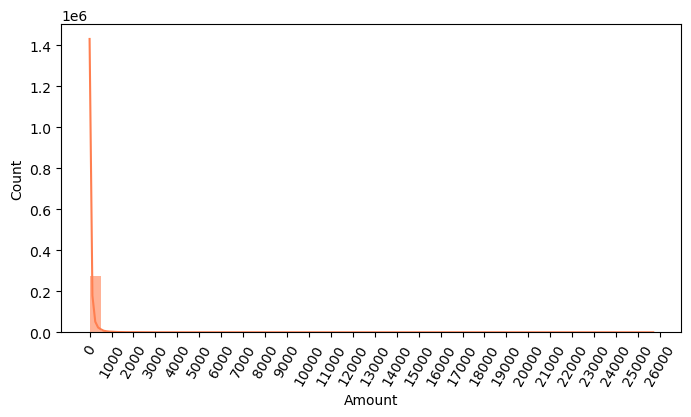

In [73]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'],bins=50,
    color='coral',
    alpha=0.6,
    edgecolor=None,
    kde=True )
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처 값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    #기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [75]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('< 로지스틱 회귀 예측 성능 >')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n< LightGBM 예측 성능 >')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


< 로지스틱 회귀 예측 성능 >
오차행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, F1: 0.7294, AUC: 0.8141

< LightGBM 예측 성능 >
오차행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC: 0.8750


정규분포 형태로 Amount 피처값을 변환한 후 적용한 두 모델 모두 이전과 비교해서 성능이 크게 개선되지 않음

In [76]:
# Numpy - log1p() 함수 이용해서 로그 변환 수행
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [77]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('< 로지스틱 회귀 예측 성능 >')
get_model_train_eval(lr_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n< LightGBM 예측 성능 >')
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

< 로지스틱 회귀 예측 성능 >
오차행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC: 0.8006

< LightGBM 예측 성능 >
오차행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.8817


LightGBM의 경우    
정밀도, 재현율, ROC_AUC에서 약간의 성능 개선

# 이상치 데이터 제거 후 모델 학습 / 예측 / 평가

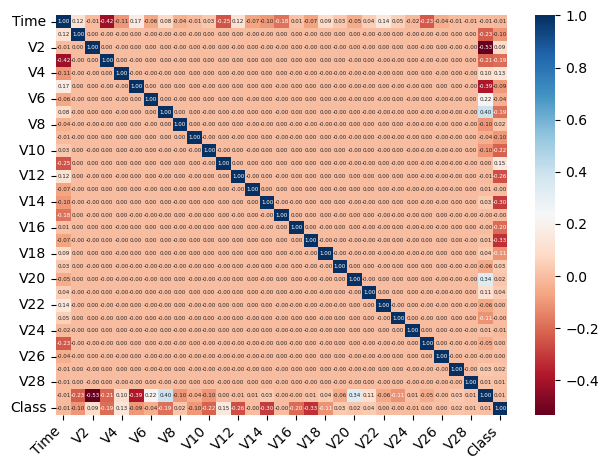

In [78]:
plt.Figure(figsize=(20,18))
sns.heatmap(card_df.corr(), cmap='RdBu', annot=True, annot_kws={"size":4}, fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Class 와 음의 상관관계가 가장 높은 피처   
: V14(-0.3) 와 V17(-0.33)

V14만 이상치 제거해보기

In [79]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    low_val = q25 - iqr_weight
    high_val = q75 + iqr_weight
    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index

In [80]:
get_outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print(f'이상치 데이터 인덱스 : {get_outlier_index}')

이상치 데이터 인덱스 : Index([8296, 8615, 9035, 9252], dtype='int64')


이상치 인덱스: 8296, 8615, 9035, 9252   
이상치 추출, 삭제하는 로직 get_processed_df() 함수에 추가 적용 해보기

In [81]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('< 로지스틱 회귀 예측 성능 >')
get_model_train_eval(lr_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n< LightGBM 예측 성능 >')
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

< 로지스틱 회귀 예측 성능 >
오차행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, F1: 0.7568, AUC: 0.8355

< LightGBM 예측 성능 >
오차행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9144


이상치 제거 후 로지스틱 회귀의 경우   
재현율: 0.6014(로지스틱회귀(제거전)) -> 0.6712 (제거후)   

이상치 제거 후 LightGBM의 경우
재현율:0.7635(제거전) -> 0.8288(제거후)

크게 증가함

V17도 제거해보기

In [82]:
def get_outlier_v17(df=None, weight=1.5):
    fraud = df[df['Class'] == 1]['V17']
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    low_val = q25 - iqr_weight
    high_val = q75 + iqr_weight
    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index


In [83]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.insert(0, 'Amount_Scaled', np.log1p(df_copy['Amount']))
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    # V17 이상치만 제거
    outlier_index = get_outlier_v17(df=df_copy, weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)

    return df_copy


In [84]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('< 로지스틱 회귀 예측 성능 >')
get_model_train_eval(lr_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n< LightGBM 예측 성능 >')
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

< 로지스틱 회귀 예측 성능 >
오차행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC: 0.8006

< LightGBM 예측 성능 >
오차행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.8817


# SMOTE 오버 샘플링 적용 후 모델 학습 / 예측 / 평가

 SMOTE 기법으로 오버 샘플링을 적용한 뒤 두 모델의 예측 성능을 평가   
 (단, SMOTE 를 적용할 때 반드시 학습 데이터 세트에만 오버 샘플링해야함)   
 오버 샘플링은 **fit_sample()** 메서드를 사용함

In [85]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)  # ← 여기 수정

print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 세트: {X_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 학습용 피처/레이블 데이터 세트: {X_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')


SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ((199364, 29), (199364,))
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ((398040, 29), (398040,))
SMOTE 적용 후 레이블 값 분포: 
Class
0    199020
1    199020
Name: count, dtype: int64


SMOTE 적용 전 : 199364건   
SMOTE 적용 후 : 398040건 (2배 가까이 증가)   
레이블 값 0과 1의 분포가 동일하게 199020개 생성


In [86]:
lr_clf = LogisticRegression()
# ftr_train 과 tgt_train 인자 값이 SMOTE 증식된 X_train_over 와 y_train_over로 변경
get_model_train_eval(lr_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC: 0.8006


In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


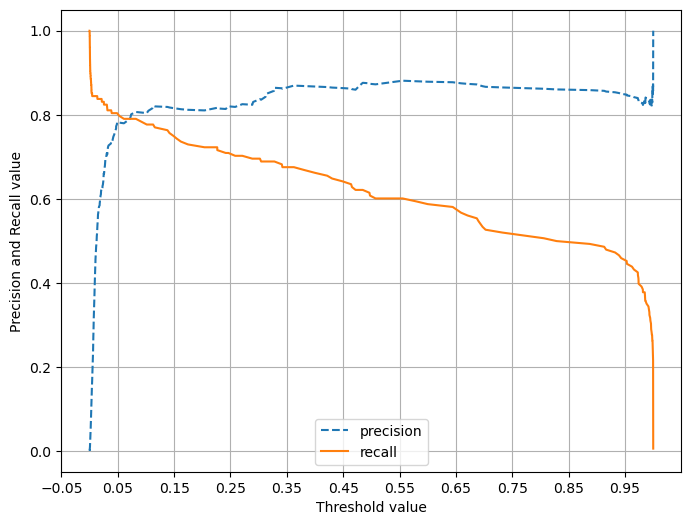

In [88]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [89]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, frt_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.8817


이상치만 제거한 경우와 비교
재현율 :  0.6014 -> 0.7635   
정밀도 :  0.8725 -> 0.9576

SMOTE 를 적용하면 재현율과 정밀도는 높아진다
